<a href="https://colab.research.google.com/github/ericyoc/ml_portfolio/blob/main/regression_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# regression with keras

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense

In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
# define regression model
def regression_model(n_cols):
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [4]:
def main():
    # load dataset
    concrete_data = pd.read_csv('ml_data/concrete_data.csv')
    print("First few rows of the dataset:")
    print(concrete_data.head())

    # pre-process dataset
    print("\nShape of the dataset:", concrete_data.shape)
    print("\nDescriptive statistics of the dataset:")
    print(concrete_data.describe())
    print("\nNumber of missing values in each column:")
    print(concrete_data.isnull().sum())

    # The data looks very clean and is ready to be used to build our model.

    # split data into predictors and target
    concrete_data_columns = concrete_data.columns
    predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']]  # all columns except Strength
    target = concrete_data['Strength']  # Strength column

    print("\nFirst few rows of the predictors:")
    print(predictors.head())
    print("\nFirst few rows of the target:")
    print(target.head())

    # normalize the data by subtracting the mean and dividing by the standard deviation
    predictors_norm = (predictors - predictors.mean()) / predictors.std()
    print("\nFirst few rows of the normalized predictors:")
    print(predictors_norm.head())

    # save the number of predictors to n_cols since will need this number when building our network.
    n_cols = predictors_norm.shape[1]  # number of predictors

    # split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=0.3, random_state=42)

    # build the model
    model = regression_model(n_cols)

    # train the model
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, verbose=2)

    # evaluate the model on the testing set
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("\nMean Squared Error (MSE) on the testing set: {:.2f}".format(mse))
    print("R-squared (R2) on the testing set: {:.2f}".format(r2))

    # plot the training and validation loss
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    plt.show()

    # plot the actual vs predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.show()

First few rows of the dataset:
   Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  Strength  
0            1040.0           676.0   28     79.99  
1            1055.0           676.0   28     61.89  
2             932.0           594.0  270     40.27  
3             932.0           594.0  365     41.05  
4             978.4           825.5  360     44.30  

Shape of the dataset: (1030, 9)

Descriptive statistics of the dataset:
            Cement  Blast Furnace Slag      Fly Ash        Water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825 

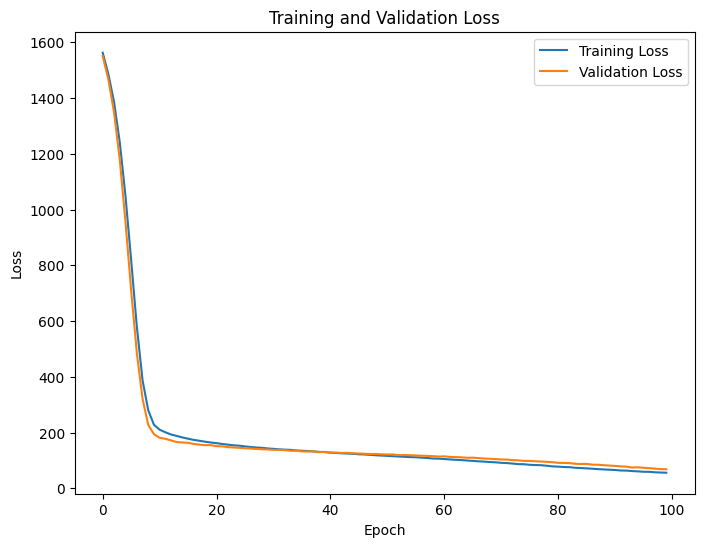

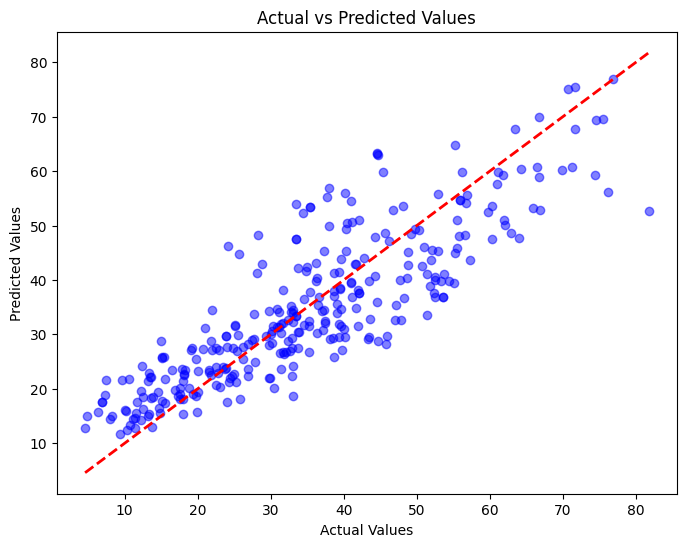

In [5]:
if __name__ == "__main__":
    main()